In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load dataset
file_path = 'water-quality-1.csv'
data = pd.read_csv(file_path)



In [62]:
print(data.info())
print("\nSample data:")
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259444 entries, 0 to 1259443
Data columns (total 25 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Sample ID         1259444 non-null  int64  
 1   Grab ID           882666 non-null   float64
 2   Profile ID        1259444 non-null  int64  
 3   Sample Number     1259444 non-null  object 
 4   Collect DateTime  1259444 non-null  object 
 5   Depth (m)         882666 non-null   float64
 6   Site Type         1259444 non-null  object 
 7   Area              1259311 non-null  object 
 8   Locator           1259444 non-null  object 
 9   Site              1259444 non-null  object 
 10  Parameter         1259444 non-null  object 
 11  Value             1150359 non-null  float64
 12  Units             1258664 non-null  object 
 13  QualityId         1259444 non-null  int64  
 14  Lab Qualifier     149373 non-null   object 
 15  MDL               607733 non-null   float64
 16  

In [93]:
print (data.shape)

(1259444, 25)


In [94]:
print (data.describe())

          Sample ID        Grab ID    Profile ID      Depth (m)         Value  \
count  1.259444e+06  882666.000000  1.259444e+06  882666.000000  1.150359e+06   
mean   8.072059e+04   88473.753640  4.265437e+04      10.602864  1.534332e+02   
std    5.168191e+04   46349.581657  1.659986e+04      14.142444  6.204438e+03   
min    5.310000e+02     700.000000  4.000000e+00       0.000000 -1.600000e+00   
25%    3.191200e+04   54359.250000  3.647275e+04       1.000000  9.100000e-01   
50%    7.482800e+04   86714.000000  4.273100e+04       6.000000  7.630000e+00   
75%    1.257890e+05  125306.000000  5.025800e+04      15.000000  2.400000e+01   
max    1.860330e+05  186033.000000  7.911900e+04     201.000000  1.000000e+06   

          QualityId            MDL            RDL     Replicates  \
count  1.259444e+06  607733.000000  606146.000000    1641.000000   
mean   1.948271e+00       0.323792       1.900974  105815.064595   
std    5.608278e-01       0.495199       3.280455   55902.772689  

In [63]:
print(data.columns)

Index(['Sample ID', 'Grab ID', 'Profile ID', 'Sample Number',
       'Collect DateTime', 'Depth (m)', 'Site Type', 'Area', 'Locator', 'Site',
       'Parameter', 'Value', 'Units', 'QualityId', 'Lab Qualifier', 'MDL',
       'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates',
       'Replicate Of', 'Method', 'Date Analyzed', 'Data Source'],
      dtype='object')


In [64]:
sns.set(style="whitegrid")

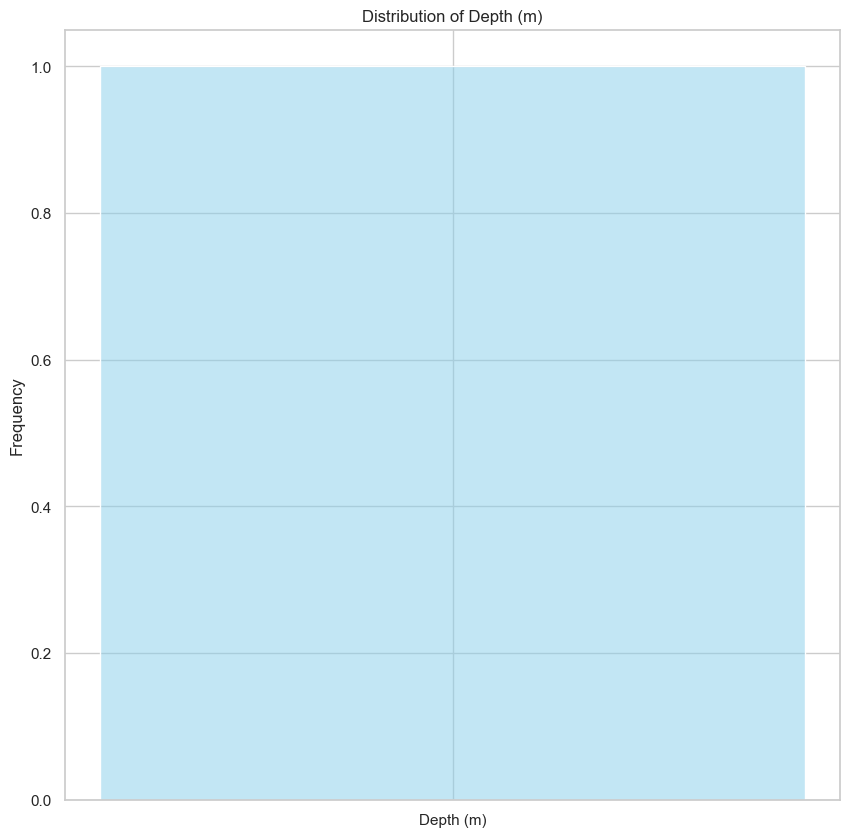

In [84]:
plt.figure(figsize=(10, 10))
sns.histplot(['Depth (m)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Depth (m)')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10288\952110108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Site Type', palette='Set2')


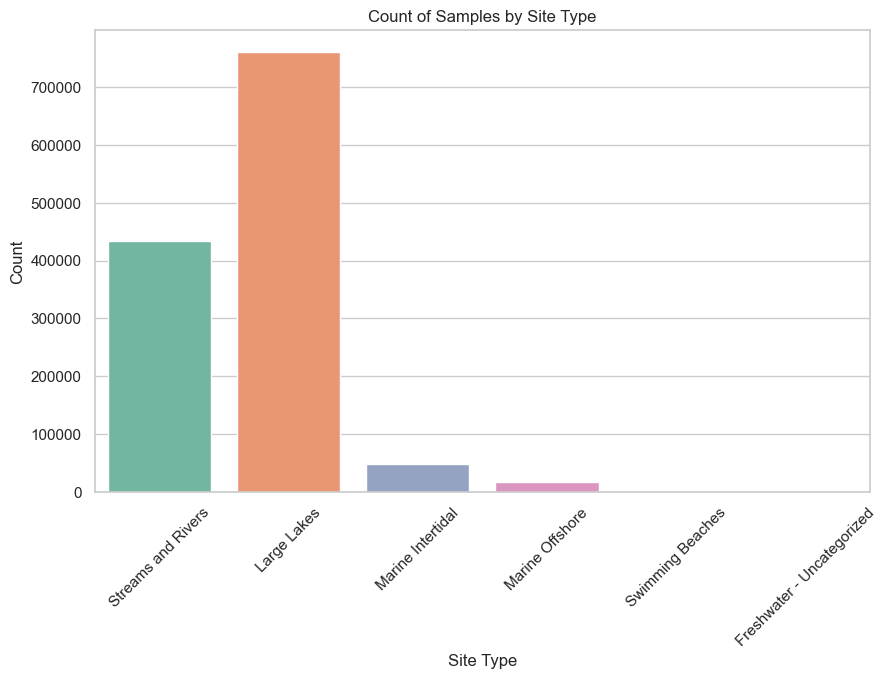

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Site Type', palette='Set2')
plt.title('Count of Samples by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

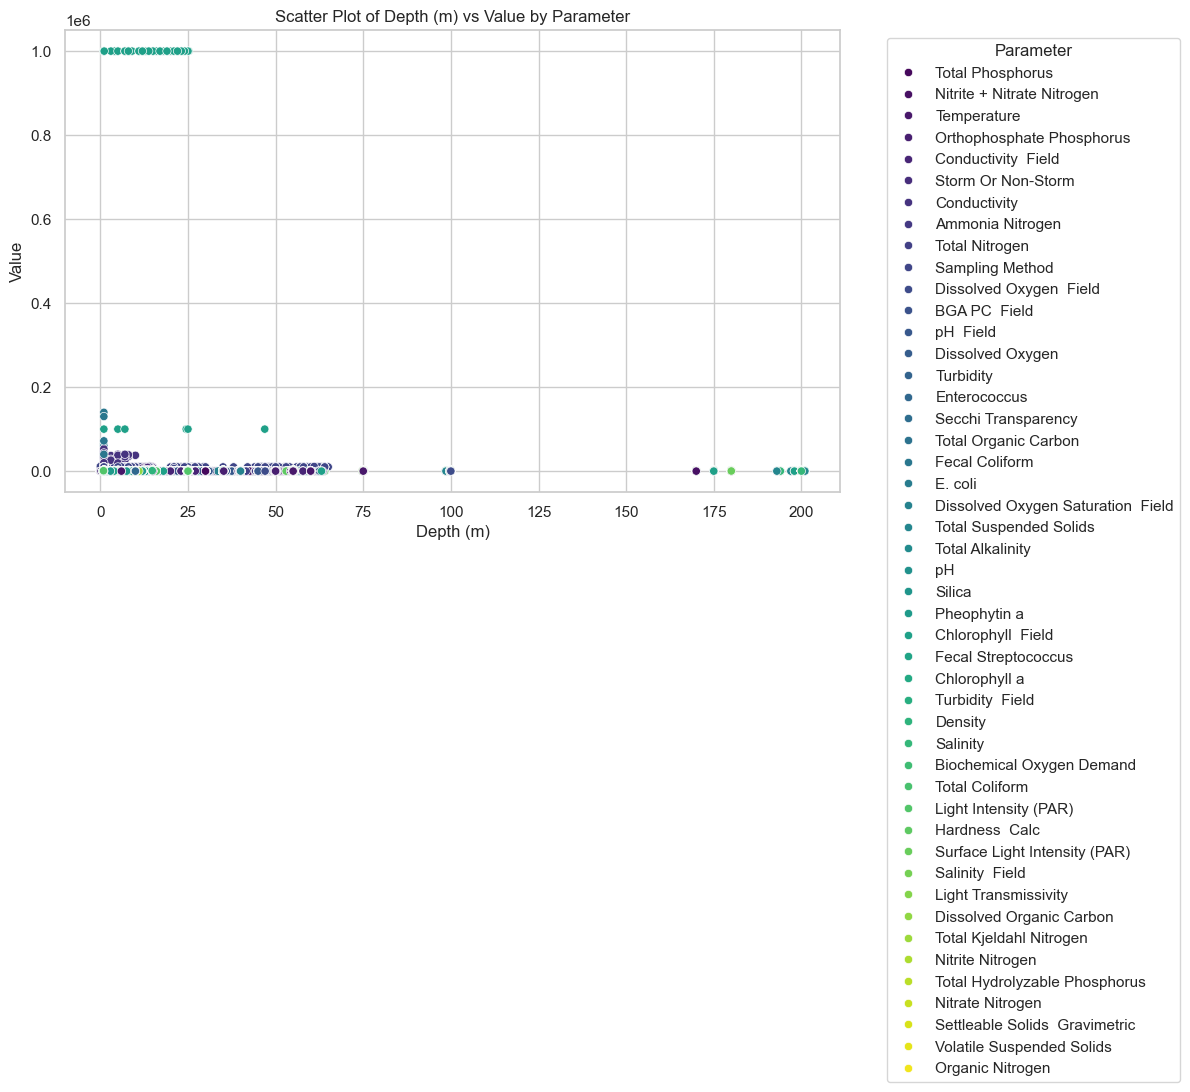

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Depth (m)', y='Value', hue='Parameter', palette='viridis')
plt.title('Scatter Plot of Depth (m) vs Value by Parameter')
plt.xlabel('Depth (m)')
plt.ylabel('Value')
plt.legend(title='Parameter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

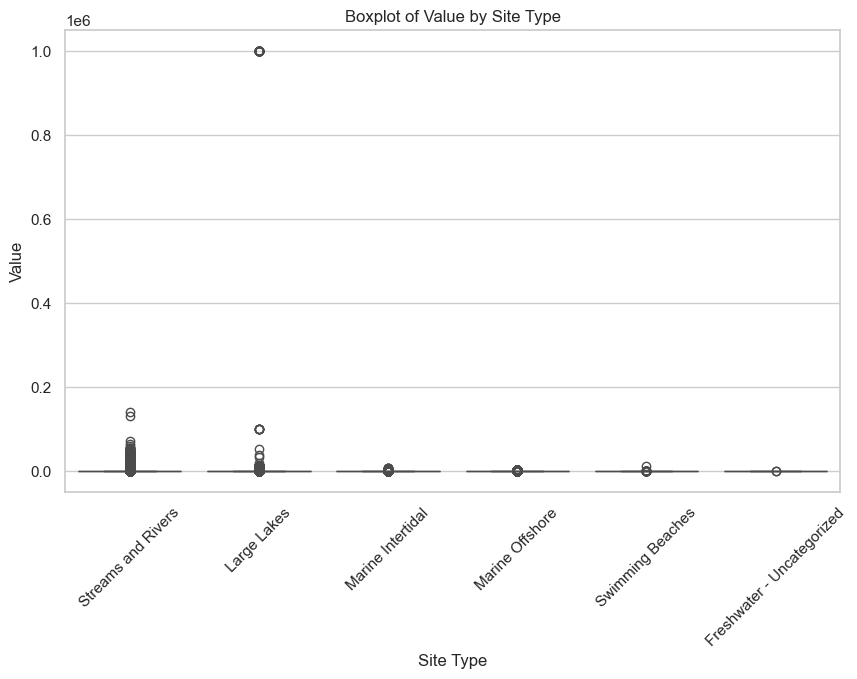

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Site Type', y='Value')
plt.title('Boxplot of Value by Site Type')
plt.xlabel('Site Type')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10288\27024078.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Parameter', y='Value', palette='Set1')


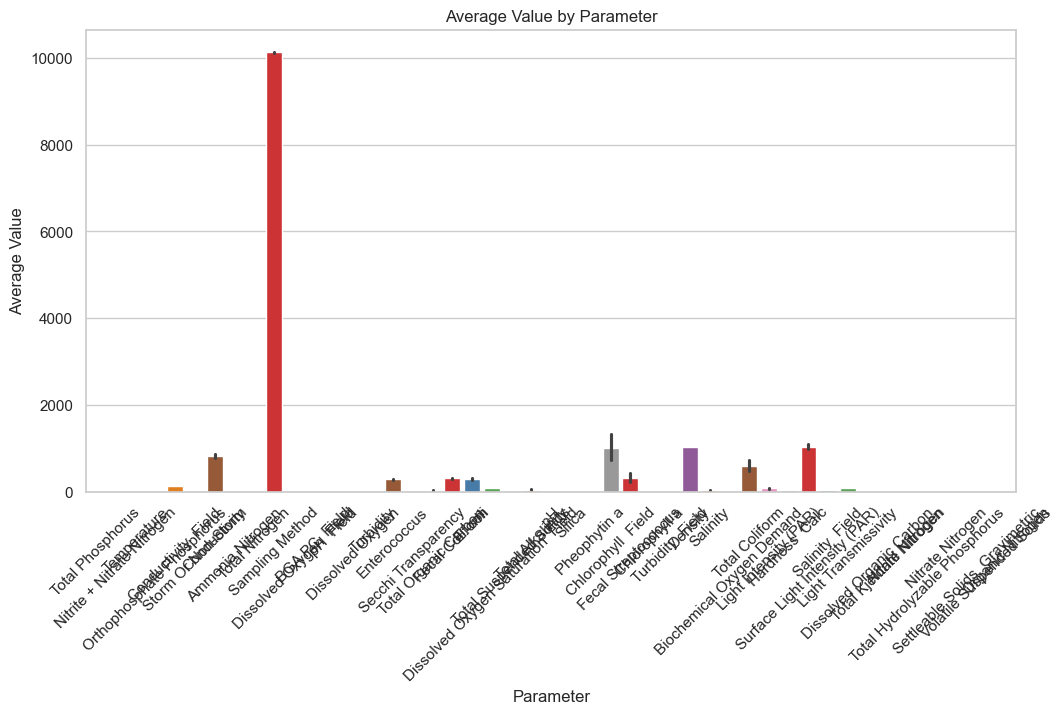

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Parameter', y='Value', palette='Set1')
plt.title('Average Value by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()

In [100]:
cols_to_remove = ['Lab Qualifier', 'MDL',
       'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates',
       'Replicate Of']

water_quality_clean = data.drop(cols_to_remove, axis=1)

In [101]:
water_quality_clean.fillna("Unknown", inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10288\1323714105.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  water_quality_clean.fillna("Unknown", inplace=True)


In [102]:
duplicates =  water_quality_clean.duplicated().sum()
duplicates

0

In [95]:
 def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    
    display(summ)

In [96]:
summary(data)

data shape: (1259444, 25)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Sample ID,int64,0,0.000000,0,154694,1259444,16316,8937,137745
Grab ID,float64,376778,0.299162,0,112985,882666,16316.0,8937.0,137745.0
Profile ID,int64,0,0.000000,0,54951,1259444,10702,37688,54368
Sample Number,object,0,0.000000,0,154694,1259444,9209019,7915489,L58228-1
Collect DateTime,object,0,0.000000,0,102284,1259444,04/13/1992 12:00:00 AM,06/20/1979 12:00:00 AM,06/25/2013 08:09:00 AM
Depth (m),float64,376778,0.299162,0,646,882666,1.0,1.0,1.0
Site Type,object,0,0.000000,0,6,1259444,Streams and Rivers,Streams and Rivers,Large Lakes
Area,object,133,0.000106,0,67,1259311,Pipers,Crisp,Lake Union/Ship Canal
Locator,object,0,0.000000,0,180,1259444,KSHZ06,0321,0512
Site,object,0,0.000000,0,178,1259444,Pipers Creek mouth,Crisp Creek mouth at SE Green Valley Rd,Ship Canal above locks


In [103]:
summary(water_quality_clean)

data shape: (1259444, 17)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,First Value,Second Value,Third Value
Sample ID,int64,0,0.0,0,154694,1259444,16316,8937,137745
Grab ID,object,0,0.0,0,112986,1259444,16316.0,8937.0,137745.0
Profile ID,int64,0,0.0,0,54951,1259444,10702,37688,54368
Sample Number,object,0,0.0,0,154694,1259444,9209019,7915489,L58228-1
Collect DateTime,object,0,0.0,0,102284,1259444,04/13/1992 12:00:00 AM,06/20/1979 12:00:00 AM,06/25/2013 08:09:00 AM
Depth (m),object,0,0.0,0,647,1259444,1.0,1.0,1.0
Site Type,object,0,0.0,0,6,1259444,Streams and Rivers,Streams and Rivers,Large Lakes
Area,object,0,0.0,0,68,1259444,Pipers,Crisp,Lake Union/Ship Canal
Locator,object,0,0.0,0,180,1259444,KSHZ06,0321,0512
Site,object,0,0.0,0,178,1259444,Pipers Creek mouth,Crisp Creek mouth at SE Green Valley Rd,Ship Canal above locks
